# Partitioning

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
clean_9000 = 'result_clean_pdf_9000_files.csv'
clean_109 = 'result_clean_pdf_109_embed_video.csv'
malw_173 = 'result_malware_pdf_cve_sorted_173_files.csv'
malw_10982 = 'result_malware_pdf_pre_04-2011_10982_files.csv'
df_clean_9000 = pd.read_csv(clean_9000, sep=',')
df_clean_109 = pd.read_csv(clean_109, sep=',')
df_malw_173 = pd.read_csv(malw_173, sep=',')
df_malw_10982 = pd.read_csv(malw_10982, sep=',')

In [4]:
df_clean = pd.concat([df_clean_9000, df_clean_109], axis=0, ignore_index=True)
df_malw = pd.concat([df_malw_10982, df_malw_173], axis=0, ignore_index=True)

df_clean["malware"] = np.zeros(df_clean.shape[0], dtype='bool')
df_malw["malware"] = np.ones(df_malw.shape[0], dtype='bool')

In [5]:
df_tot = pd.concat([df_clean, df_malw], axis=0, ignore_index=True)

# Separate feature data from class label
X_tot = df_tot.iloc[:,:-1]
y_tot = df_tot.iloc[:,-1:]

X_train, X_test, y_train, y_test= train_test_split(X_tot, y_tot,
                                                   test_size= 0.1,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   stratify=df_tot['malware'],
                                                   random_state= 0)

#X_train.to_csv("pdf_train.csv", index = False)
#df_val.to_csv("pdf_val.csv", index = False)
#df_test.to_csv("pdf_test.csv", index = False)

array([[<AxesSubplot: xlabel='obj', ylabel='obj'>,
        <AxesSubplot: xlabel='endobj', ylabel='obj'>,
        <AxesSubplot: xlabel='stream', ylabel='obj'>,
        <AxesSubplot: xlabel='endstream', ylabel='obj'>,
        <AxesSubplot: xlabel='xref', ylabel='obj'>,
        <AxesSubplot: xlabel='trailer', ylabel='obj'>,
        <AxesSubplot: xlabel='startxref', ylabel='obj'>,
        <AxesSubplot: xlabel='/Page', ylabel='obj'>,
        <AxesSubplot: xlabel='/Encrypt', ylabel='obj'>,
        <AxesSubplot: xlabel='/ObjStm', ylabel='obj'>,
        <AxesSubplot: xlabel='/JS', ylabel='obj'>,
        <AxesSubplot: xlabel='/JavaScript', ylabel='obj'>,
        <AxesSubplot: xlabel='/AA', ylabel='obj'>,
        <AxesSubplot: xlabel='/OpenAction', ylabel='obj'>,
        <AxesSubplot: xlabel='/AcroForm', ylabel='obj'>,
        <AxesSubplot: xlabel='/JBIG2Decode', ylabel='obj'>,
        <AxesSubplot: xlabel='/RichMedia', ylabel='obj'>,
        <AxesSubplot: xlabel='/Launch', ylabel='obj'>,
      

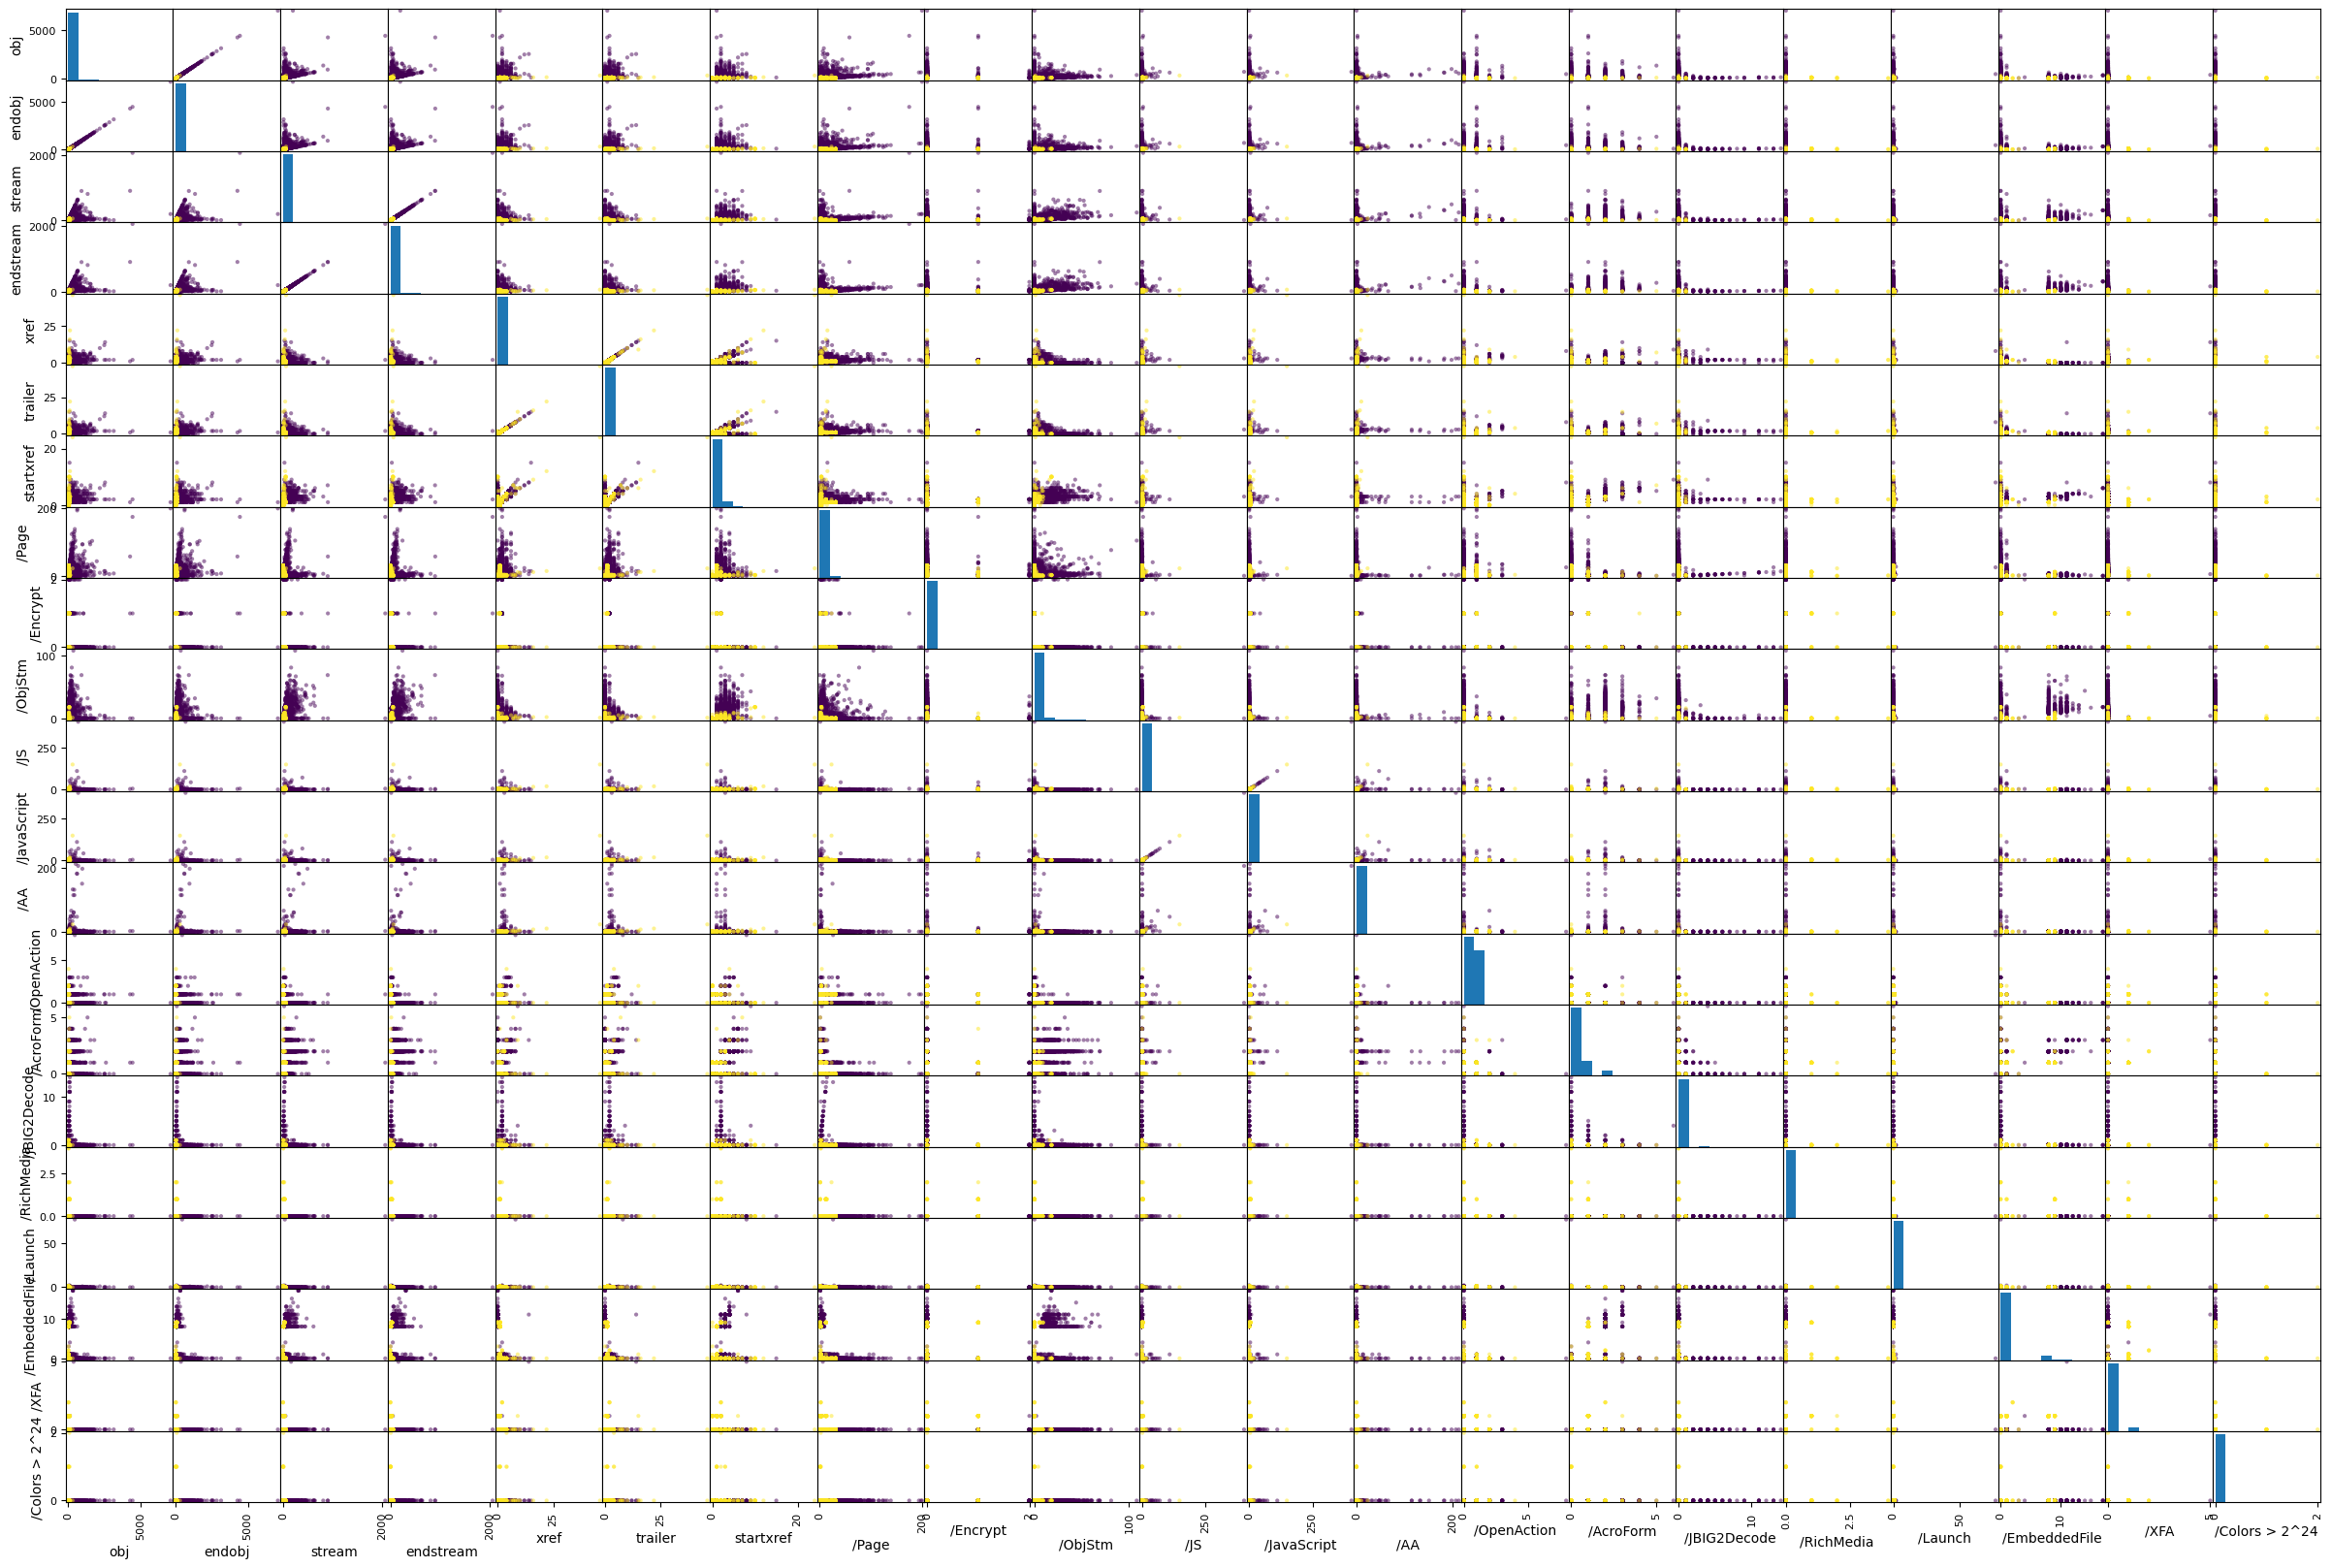

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_tot, c=df_tot['malware'], figsize=(30,20))

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)
y_test_predicted = knn_clf.predict(X_test).reshape(-1,1)
print('Accuracy: %f%%' % (metrics.accuracy_score(y_test, y_test_predicted)*100))

/Users/mattiarosso/opt/anaconda3/envs/malis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 99.455715%


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_test_predicted = gnb_clf.predict(X_test).reshape(-1,1)
print('Accuracy: %f%%' % (metrics.accuracy_score(y_test, y_test_predicted)*100))

Accuracy: 81.939634%


/Users/mattiarosso/opt/anaconda3/envs/malis/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.ensemble import RandomForestClassifier
tree_clf = RandomForestClassifier()
tree_clf.fit(X_train, y_train)
y_test_predicted = tree_clf.predict(X_test).reshape(-1,1)
accuracy = (y_test.values == y_test_predicted).sum() / len(y_test_predicted)
error_rate = 1-accuracy
print('Error rate: %f%%' % (error_rate*100))
print('Accuracy: %f%%' % (accuracy*100))

/var/folders/48/1_svc68j0_b2js686ls_zqhh0000gn/T/ipykernel_13471/2742071699.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree_clf.fit(X_train, y_train)


Error rate: 0.098961%
Accuracy: 99.901039%
